# <b>Loading libraries</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


# <b>Loading dataset</b>

In [38]:
#I want to predict if password is strong or not given a various passwords 

#passwords=pd.read_csv (r"C:\Users\yuval\data.csv")#import DATASET to the notebook
#passwords
data = pd.read_csv(r"C:\Users\yuval\data.csv", error_bad_lines=False)
data

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# <b>know and organize the dataset</b>

In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(669640, 2)

In [4]:
#see how many values are in strength column
set(data["strength"].to_list())

{0, 1, 2}

**Explanation about the columns:**<br>

**What are the features?**<br>
password-object consists of numbers and letters. <br>

**What is the response?**<br>
strength-as we saw,and as it already wrote in Kaggle -three values(0 , 1 , 2)- 0 for weak, 1 for medium, 2 for strong.<br>

**What else do we know?**<br>
There are 669640  observations (represented by the rows)

In [5]:
#To get quick description of the data,particular about the total number of rows, 
#each attribute’s type, and the number of nonnull values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
#I want to check what the range of all strength column: 
data.describe()
#i can see that the range is like they wrote in kaggle-0-2, and the mean strength for all the column is 0.990196

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


# <b>Duplicates values</b>

In [39]:
#if there are duplicate passwords-i want to delete it
data=data.drop_duplicates(subset=['password'],keep=False)#remove duplicates on specifics columns
data
#as we can see the number of rows still the same, so there are no duplicate values

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# <b>Nan values</b>

In [40]:
#check for null values
print(data.isnull().sum())


password    1
strength    0
dtype: int64


In [41]:
#ill check the NaN value of the column password    
NaNPass=data[data['password'].isna()]
NaNPass

,password,strength
367579,NaN,0


In [42]:
#i have no need of this value, so ill delete this 
data.dropna(axis=0,inplace=True)
#ill check again to make sure   
NaNPass=data[data['password'].isna()]
NaNPass

,password,strength


In [43]:
#lets see how many password get any strength
data["strength"].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

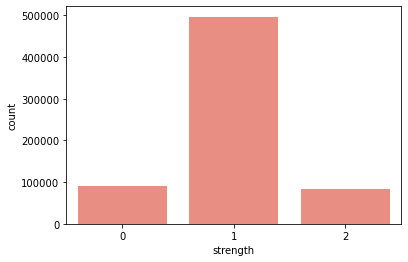

In [44]:
#now, lets see it by graph
sns.countplot(data["strength"],data=data,color="salmon")

In [45]:
#i would like to create new column of pass_len represent the lenght of each password
#first of all, ill turn the type of column 'password' to string, so all the types will be the same, and also mor comfortable to work with string.len()
data['password']=data['password'].astype(str)


In [47]:
#create the new colimn
data['pass_len']=data['password'].str.len()#in every cell put the length of the password
#also can be write as:
#data['pass_len']=data['password'].apply(lambda x: len(x))
data

,password,strength,pass_len
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11
...,...,...,...
669635,10redtux10,1,10
669636,infrared1,1,9
669637,184520socram,1,12
669638,marken22a,1,9


In [69]:
#see what values are in strength column (its very long so i put it in comment)
#set(data["pass_len"].to_list())
#see how many password have certain lenght value(also very long so i put it in comment)
#data["pass_len"].value_counts()******************************************************************graph

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 45,
 48,
 50,
 64,
 68,
 100,
 147,
 185,
 192,
 220}

In [ ]:
#now i would like to see what the relations between password lenght to its strength


In [67]:
#now i would like to see what the relations between password lenght to its strength
#data.groupby(["pass_len","strength"]).count()
dftemp=data.groupby(["pass_len","strength"]).count()
dftemp

,,password
pass_len,strength,
1,0,3
2,0,10
3,0,24
4,0,36
5,0,164
6,0,39801
7,0,49663
8,1,112321
9,1,144490


In [ ]:
plt.scatter(data['review_taste'],BeerReviews['review_overall'])

In [36]:
dftemp=data.query('pass_len1 == "220"')
dftemp

,password,strength,pass_len,pass_len1
26964,In0LnUoff8wfayJGqzelyDqg4AMl9gBhgl3T2iZeONzh5g...,2,220,220


In [ ]:
#i would like to create new column of pass_len represent the lenght of each password
data['pass_len']=data['password']
for i in data.index:
    data.loc[i, 'pass_len']=len(data.loc[i, 'password'])



In [ ]:
#now, i want to split the password column to different 3 columns- passwords with only numbers, passwords with only letters, and passwords with both letters and numbers

In [ ]:
#dftemp=df.query('title == "Hamlet" and year == "1921" ')
